# Ice_games

### Introducción
En este proyecto tendré como objetivo identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias. Trabajaré con los datos de videojuegos de la empresa Ice que vende por todo el mundo.
### Objetivo
Probar las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
### Etapas
1. Inicialización y estudio de la información general de los datos
2. Preparación de los datos
3. Análisis de datos
4. Crear un perfil de usuario para cada región
5. Probar las hipótesis
6. Conclusión general

## Inicialización y estudio de la información general de los datos

In [199]:
# Cargar todas las librerías
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [200]:
# Carga el archivo de datos en un DataFrame
data_games = pd.read_csv('/datasets/games.csv')

In [201]:
#Revisando las primeras filas del DataFrame
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [202]:
#Revisando las últimas filas del DataFrame
data_games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [203]:
#Revisando la información general del DataFrame
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conclusiones
Luego de importar las librerías, cargar los datos y estudiar la información general puedo llegar a la conclusión de que el total de filas es 16715, columnas son 11 y existen valores ausentes en las columnas Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating. Observo además que los nombres de las columnas deben ser completamente en minúsculas por lo que debo corregirlos, existen también unas columnas tipo float que deben ser del tipo enteros. A continuación trabajaré en dichos temas.

## Preparación de los datos

In [204]:
# Conversión de todas las letras de las columnas a minúsculas
data_games.columns = map(str.lower, data_games.columns)
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*Lo primero que hice fue cumplir con la ortografía en los nombres de las columnas y convertir todas sus letras a minúsculas.*

In [205]:
# Comprobando los valores ausentes en las columnas name y genre
data_games[(data_games['name'].isna() == True) & (data_games['genre'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [206]:
#Eliminando las filas
data_games = data_games.drop([659, 14244], axis=0)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Luego de revisar de que en las columnas name y genre faltan valores ausentes en las mismas columnas, que además en esas filas faltan valores de otras columnas y son solo 2 filas, decidí eliminarlas porque no son necesarias para el posterior análisis de los datos.

En la columna year_of_release considero que si debo imputar los valores ausentes ya que serán muy útiles y necesarios esos datos, para ello utilizaré dataset externos, principalmente de la siguiente página: https://www.kaggle.com/. Ya que estos valores deben ser precisos necesito utilizar esta documentación extra.

In [207]:
# Carga el archivo de datos en un DataFrame
data_extra = pd.read_csv('https://raw.githubusercontent.com/lmallea/otro-archivo-para-el-proyecto-Integrado/master/Video_Game_Sales_as_of_Jan_2017_?token=GHSAT0AAAAAAB2LJXEROYJB6TEXPPXU4IUAY2XOHVA')

In [208]:
# Conversión de todas las letras de las columnas a minúsculas
data_extra.columns = map(str.lower, data_extra.columns)
data_extra

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [209]:
#Realizando el merge con el Dataframe original
data_extra_merge = data_games.merge(data_extra, on= ['name','platform','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score'], how= 'left')
data_extra_merge

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score_x,rating_x,year_of_release_y,publisher,global_sales,critic_count,user_score_y,user_count,rating_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0,Nintendo,82.54,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0,Nintendo,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0,Codemasters,0.01,NaN,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003.0,Wanadoo,0.01,NaN,NaN,NaN,NaN


In [210]:
#Remplazando los valores ausentes
data_extra_merge['year_of_release_x'] = data_extra_merge['year_of_release_x'].fillna(data_extra_merge['year_of_release_y'])
data_extra_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16713 non-null  object 
 1   platform           16713 non-null  object 
 2   year_of_release_x  16663 non-null  float64
 3   genre              16713 non-null  object 
 4   na_sales           16713 non-null  float64
 5   eu_sales           16713 non-null  float64
 6   jp_sales           16713 non-null  float64
 7   other_sales        16713 non-null  float64
 8   critic_score       8137 non-null   float64
 9   user_score_x       10014 non-null  object 
 10  rating_x           9949 non-null   object 
 11  year_of_release_y  13342 non-null  float64
 12  publisher          13348 non-null  object 
 13  global_sales       13348 non-null  float64
 14  critic_count       6179 non-null   float64
 15  user_score_y       5703 non-null   float64
 16  user_count         570

In [211]:
#Eliminando columnas sobrantes
data_extra_merge = data_extra_merge.drop(['year_of_release_y','user_score_y','rating_y','publisher','global_sales','critic_count','user_count'], axis=1)

In [212]:
#Renombrando las columnas para que queden como las originales
data_extra_merge.rename(columns={'year_of_release_x':'year_of_release','user_score_x':'user_score','rating_x':'rating'}, inplace=True)
data_extra_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16663 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [213]:
# Carga el archivo de datos en un DataFrame
data_other = pd.read_csv('https://raw.githubusercontent.com/lmallea/vgsales-12-4-2019/master/vgsales-12-4-2019')
data_other

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [214]:
# Conversión de todas las letras de las columnas a minúsculas
data_other.columns = map(str.lower, data_other.columns)

In [215]:
#Renombrando una columna
data_other.rename(columns={'year':'year_of_release'},inplace=True)

In [216]:
#Comprobando el cambio de nombre
data_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             55792 non-null  int64  
 1   name             55792 non-null  object 
 2   basename         55792 non-null  object 
 3   genre            55792 non-null  object 
 4   esrb_rating      23623 non-null  object 
 5   platform         55792 non-null  object 
 6   publisher        55792 non-null  object 
 7   developer        55775 non-null  object 
 8   vgchartz_score   0 non-null      float64
 9   critic_score     6536 non-null   float64
 10  user_score       335 non-null    float64
 11  total_shipped    1827 non-null   float64
 12  global_sales     19415 non-null  float64
 13  na_sales         12964 non-null  float64
 14  pal_sales        13189 non-null  float64
 15  jp_sales         7043 non-null   float64
 16  other_sales      15522 non-null  float64
 17  year_of_rele

In [217]:
#Realizando el merge
data_other_merge = data_extra_merge.merge(data_other[['name','year_of_release', 'platform','genre','na_sales']], on= ['name', 'platform','genre','na_sales'], how= 'left')
data_other_merge

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003.0


In [218]:
#Comprobando que la tabla funciona para imputar valores ausentes
data_other_merge[data_other_merge['year_of_release_x'].isna()==True]

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2001.0
1608,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+,NaN
1698,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.00,0.05,84.0,8,M,2002.0
2009,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN,NaN
2131,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.00,0.09,77.0,7.9,E10+,2011.0
2280,Namco Museum,XB,NaN,Misc,0.77,0.11,0.00,0.04,59.0,tbd,E,2002.0
2452,The Lord of the Rings: War in the North,X360,NaN,Action,0.52,0.24,0.00,0.08,61.0,7.4,M,NaN
3222,Metal Gear Solid 2: Substance,XB,NaN,Action,0.38,0.22,0.00,0.03,87.0,8.5,M,2002.0
3485,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2001.0


In [219]:
#Remplazando los valores ausentes
data_other_merge['year_of_release_x'] = data_other_merge['year_of_release_x'].fillna(data_other_merge['year_of_release_y'])
data_other_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16713 non-null  object 
 1   platform           16713 non-null  object 
 2   year_of_release_x  16694 non-null  float64
 3   genre              16713 non-null  object 
 4   na_sales           16713 non-null  float64
 5   eu_sales           16713 non-null  float64
 6   jp_sales           16713 non-null  float64
 7   other_sales        16713 non-null  float64
 8   critic_score       8137 non-null   float64
 9   user_score         10014 non-null  object 
 10  rating             9949 non-null   object 
 11  year_of_release_y  9369 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


In [220]:
#Renombrando columnas
data_other_merge.rename(columns={'year_of_release_x':'year_of_release'},inplace=True)

In [221]:
#Comprobando cuantos valores ausentes quedan
data_other_merge['year_of_release'].isna().sum()

19

In [222]:
#Eliminando columna
data_other_merge = data_other_merge.drop('year_of_release_y',axis=1)

In [223]:
# Carga el archivo de datos en un DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/lmallea/game_sales_data/master/game_sales_data')
data

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017
...,...,...,...,...,...,...,...,...,...
19595,19594,FirePower for Microsoft Combat Flight Simulator 3,PC,GMX Media,Shockwave Productions,NaN,NaN,0.01,2004
19596,19595,Tom Clancy's Splinter Cell,PC,Ubisoft,Ubisoft,9.4,NaN,0.01,2003
19597,19596,Ashita no Joe 2: The Anime Super Remix,PS2,Capcom,Capcom,NaN,NaN,0.01,2002
19598,19597,Tokyo Yamanote Boys for V: Main Disc,PSV,Rejet,Rejet,NaN,NaN,0.01,2017


In [224]:
# Conversión de todas las letras de las columnas a minúsculas y renombrando columna
data.columns = map(str.lower, data.columns)
data.rename(columns={'year':'year_of_release'},inplace=True)

In [225]:
#Comprobando información general de la tabla
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             19600 non-null  int64  
 1   name             19600 non-null  object 
 2   platform         19600 non-null  object 
 3   publisher        19600 non-null  object 
 4   developer        19598 non-null  object 
 5   critic_score     9969 non-null   float64
 6   user_score       2223 non-null   float64
 7   total_shipped    19600 non-null  float64
 8   year_of_release  19600 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


In [226]:
#Realizando el merge
data_integrated = data_other_merge.merge(data[['name','year_of_release','platform','critic_score']], on= ['name','platform','critic_score'], how= 'left')
data_integrated

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16718,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0
16719,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN
16720,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0
16721,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003.0


In [227]:
#Comprobando que el dataset funciona para imputar valores ausentes 
data_integrated[data_integrated['year_of_release_x'].isna()==True]

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
457,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+,NaN
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN,1997.0
2453,The Lord of the Rings: War in the North,X360,NaN,Action,0.52,0.24,0.00,0.08,61.0,7.4,M,NaN
4296,The Chronicles of Riddick: Escape from Butcher...,XB,NaN,Shooter,0.32,0.11,0.00,0.02,89.0,8.9,M,NaN
6479,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.00,0.06,NaN,tbd,E10+,2011.0
7112,Big Beach Sports 2,Wii,NaN,Sports,0.09,0.11,0.00,0.02,NaN,tbd,E,2010.0
9712,Rocksmith,PC,NaN,Misc,0.06,0.04,0.00,0.01,78.0,8.1,T,NaN
10323,Happy Feet Two,PS3,NaN,Action,0.09,0.00,0.00,0.01,NaN,NaN,NaN,2011.0
12741,Mobile Ops: The One Year War,X360,NaN,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN,NaN


In [228]:
#Imputando valores ausentes
data_integrated['year_of_release_x'] = data_integrated['year_of_release_x'].fillna(data_integrated['year_of_release_y'])
data_integrated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16723 entries, 0 to 16722
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16723 non-null  object 
 1   platform           16723 non-null  object 
 2   year_of_release_x  16711 non-null  float64
 3   genre              16723 non-null  object 
 4   na_sales           16723 non-null  float64
 5   eu_sales           16723 non-null  float64
 6   jp_sales           16723 non-null  float64
 7   other_sales        16723 non-null  float64
 8   critic_score       8137 non-null   float64
 9   user_score         10015 non-null  object 
 10  rating             9950 non-null   object 
 11  year_of_release_y  6070 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


In [229]:
#renombrando columna para que quede como estaba
data_integrated.rename(columns={'year_of_release_x':'year_of_release'},inplace=True)

In [230]:
#eliminando columna sobrante
data_integrated = data_integrated.drop(['year_of_release_y'],axis=1)
data_integrated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16723 entries, 0 to 16722
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16723 non-null  object 
 1   platform         16723 non-null  object 
 2   year_of_release  16711 non-null  float64
 3   genre            16723 non-null  object 
 4   na_sales         16723 non-null  float64
 5   eu_sales         16723 non-null  float64
 6   jp_sales         16723 non-null  float64
 7   other_sales      16723 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10015 non-null  object 
 10  rating           9950 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [231]:
#Eliminando los duplicados
data_integrated = data_integrated.drop_duplicates()

In [232]:
#Comprobando que no quedan duplicados
data_integrated.duplicated().sum()

0

In [233]:
#Revisando la información general de el DataFrame resultante
data_integrated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16722
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16701 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Para llegar hasta esta tabla integrada tuve que utilizar 3 DataFrame externos, realicé merge para combinar los datos y luego con el método fillna remplacé los valores ausentes por los años correspondientes, además de esto tuve que hacer algunos arreglos para mantener el DataFrame original como eliminar filas sobrantes. También eliminé las filas duplicadas y comprobé que ya no existieran. Finalmente me quedan valores ausentes aún, hallaré el porcentaje de estos y si representan menos del 1% procederé a eliminarlos porque es muy pequeña la cantidad y no debería afectar para mi posterior análisis.

In [234]:
#Calculando porcentaje de valores ausentes en year_of_release
percentage_nans = data_integrated['year_of_release'].isna().sum()/len(data_integrated)*100
percentage_nans

0.07180039490217197

In [235]:
#Eliminando filas con valores ausentes en year_of_release
data_integrated = data_integrated.dropna(subset=['year_of_release'])

In [236]:
#Sustituyendo valores por ausentes
data_integrated['user_score'][data_integrated['user_score']=='tbd'] = float('nan')

In [237]:
#Revisando la columna user_score
data_integrated['user_score'] = data_integrated['user_score'].astype('float')
data_integrated['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Los valores 'tbd' los sustituí por valores nulos ya que según mi análisis si son valores que no se pudieron determinar es porque por algún motivo no existen, puede ser que no haya evidencia de calificaciones en esos casos.

In [238]:
# Observando los valores de la columna rating
data_integrated['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [239]:
#Sustituir los valores ausentes por unknown
data_integrated['rating'] = data_integrated['rating'].fillna('unknown')
data_integrated['rating'].isna().sum()

0

En la columna rating decidí imputar los valores ausentes con 'unknown' ya que no son tan relevantes esos valores para el análisis posterior además que sería demasiado complicado hallar el dato por otras características del juego ya que esa clasificación es dada por la Junta de clasificación de software de entretenimiento(ESRB), quienes son especialistas en el tema.

In [240]:
# Convertir columna a int y otra a float
data_integrated['year_of_release'] = data_integrated['year_of_release'].astype('int')
data_integrated['user_score'] = data_integrated['user_score'].astype('float')
data_integrated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16701 entries, 0 to 16722
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16701 non-null  object 
 1   platform         16701 non-null  object 
 2   year_of_release  16701 non-null  int64  
 3   genre            16701 non-null  object 
 4   na_sales         16701 non-null  float64
 5   eu_sales         16701 non-null  float64
 6   jp_sales         16701 non-null  float64
 7   other_sales      16701 non-null  float64
 8   critic_score     8131 non-null   float64
 9   user_score       7585 non-null   float64
 10  rating           16701 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Considero necesario luego de imputar los valores ausentes en la columna 'year_of_release' convertirla al tipo 'int' ya que dichos valores se corresponden a años, son números enteros. Igual decidí convertir 'user_score' a float ya que solo existen valores nulos y con coma flotante.

In [241]:
#suma para hallar ventas totales
data_integrated['total_sales'] = data_integrated['na_sales'] + data_integrated['eu_sales'] + data_integrated['jp_sales'] + data_integrated['other_sales']

In [242]:
#observando nueva columna
data_integrated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16718,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16719,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16720,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16721,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


Para hallar las ventas totales cree una función que realiza la suma de ventas de cada región, luego apliqué dicha función con ayuda del método apply() al DataFrame.

### Conclusiones

A modo de conclusión considero que fueron resueltos los temas principales encontrados en el DataFrame original, creando uno nuevo que será de gran utilidad para el posterior análisis. Para ello fue necesario:
1. Revisar y corregir la ortografía del nombre de las columnas, cambiando todas las letras a minúsculas.
2. Rellenar los valores ausentes en la columna 'year_of_release' con ayuda de dataset externos.
3. Cambiar los valores 'tbd' de la columna 'user_score' por nulos ya que no existen.
4. Rellenar los valores ausentes de la columna 'rating' por 'unknown' ya que solo expertos en el tema pueden definir esta clasificación.
5. Decidí dejar tal cual los valores ausentes de las columnas 'user_score' y 'critic_score' ya que la falta de estos da a entender de que quizás esos juegos aún no han recibido calificaciones.
6. Convertí las columnas 'year_of_release' y 'user_score' al tipo necesario.
7. Además agregué a la tabla una columna de ventas totales para el posterior análisis.

## Análisis de datos

<AxesSubplot:>

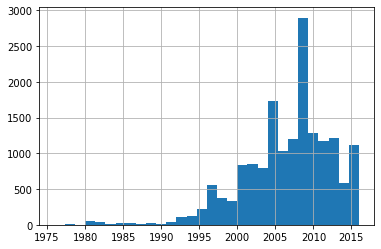

In [243]:
data_integrated['year_of_release'].hist(bins=30)

Observando los juegos lanzados cada año evidencio que por lo general aumentan mientras pasan los años pero veo un mayor lanzamiento de videojuegos en el período del año 2001 hacia adelante.

In [244]:
data_integrated.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     970.52
PS3      939.65
Wii      903.18
DS       806.08
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.02
PC       259.41
3DS      259.00
XB       257.29
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

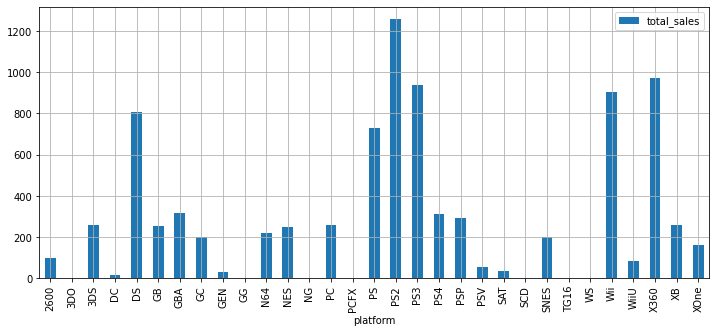

In [245]:
pivot_platform_sales = data_integrated.pivot_table(index='platform',values='total_sales',aggfunc='sum')
pivot_platform_sales.plot(grid=True,figsize=(12,5), kind='bar')
plt.show()

<AxesSubplot:xlabel='year_of_release'>

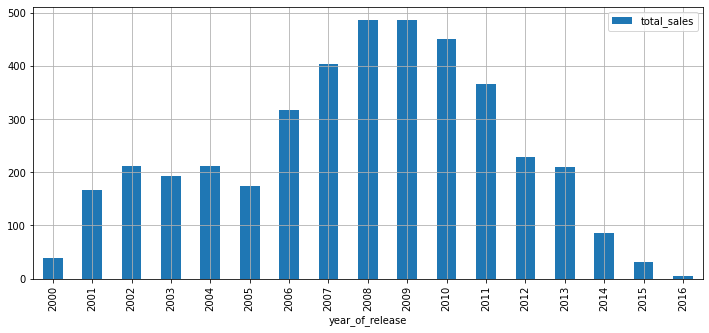

In [246]:
(data_integrated
           .query('platform == ["PS2", "X360", "PS3","Wii"]')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)

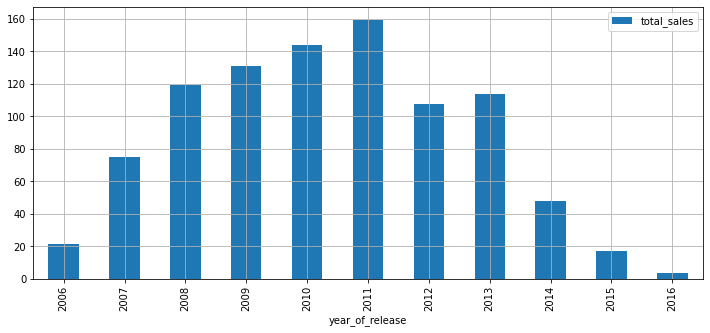

In [247]:
(data_integrated
           .query('platform == "PS3"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

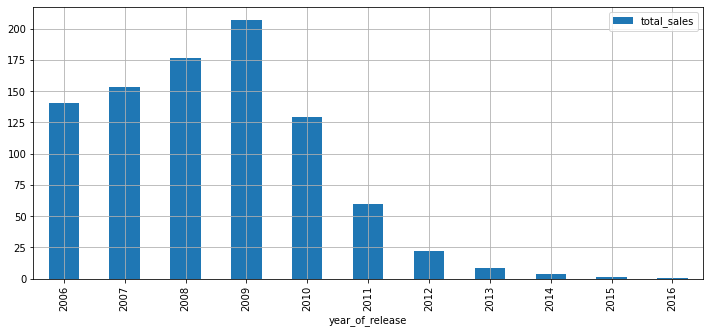

In [248]:
(data_integrated
           .query('platform == "Wii"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

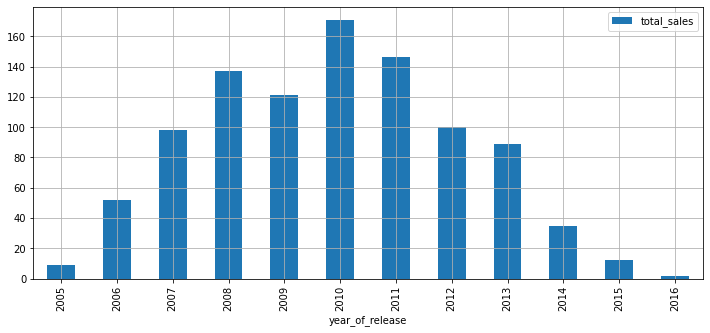

In [249]:
(data_integrated
           .query('platform == "X360"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

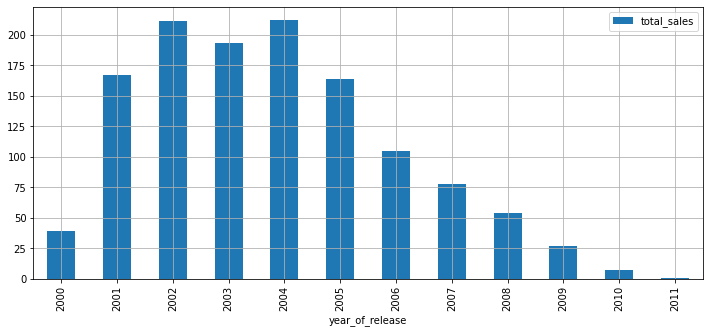

In [250]:
(data_integrated
           .query('platform == "PS2"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

Al observar las plataformas con mayores ventas totales evidencio que todas han disminuido considerablemente sus ventas, a modo general tuvieron un mayor auge durante el período del 2007 al 2011 luego comenzaron a disminuir. Considero además según mis gráficas que las nuevas plataformas tardan en aparecer y las antiguas en desaparecer aproximadamente 5 años.

***A partir de este punto trabajaré con los datos que estén entre el período del 2012 al 2016 para seguir analizando mi dataset.***

In [251]:
reduced_data = data_integrated[(data_integrated['year_of_release'] <=2016) &(data_integrated['year_of_release'] >=2012)]
reduced_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16711,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16715,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16718,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16720,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [252]:
reduced_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     289.07
X360    236.62
3DS     194.64
XOne    159.32
WiiU     82.19
PC       63.34
PSV      49.18
Wii      35.74
DS       12.61
PSP      11.59
Name: total_sales, dtype: float64

In [253]:
reduced_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

platform
X360    0.804830
PS4     0.801378
XOne    0.645020
Wii     0.638214
PS3     0.583980
WiiU    0.559116
3DS     0.490277
DS      0.394062
PC      0.247422
PSV     0.119659
PSP     0.065852
Name: total_sales, dtype: float64

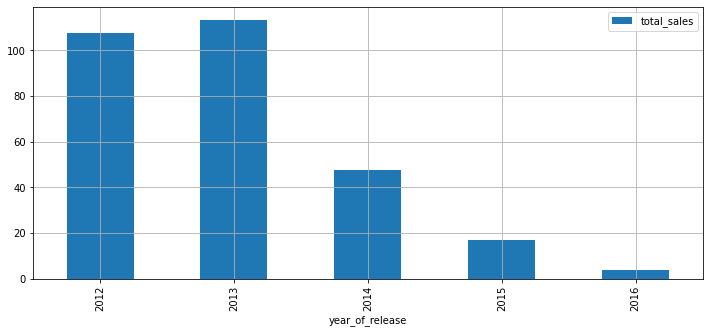

In [254]:
(reduced_data
           .query('platform == "PS3"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

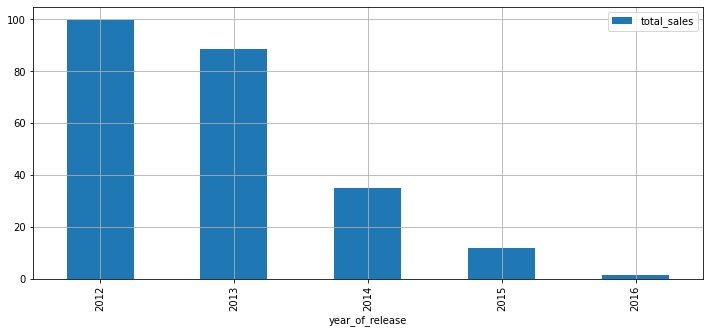

In [255]:
(reduced_data
           .query('platform == "X360"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

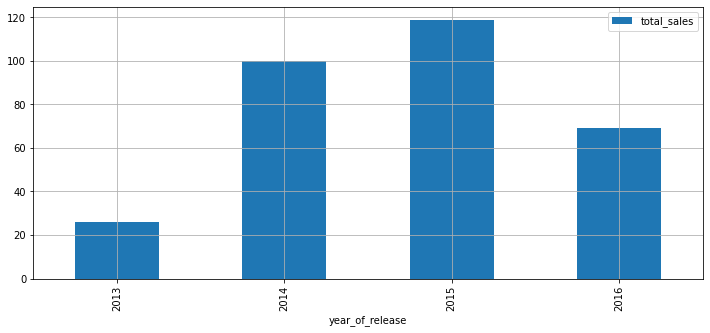

In [256]:
(reduced_data
           .query('platform == "PS4"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

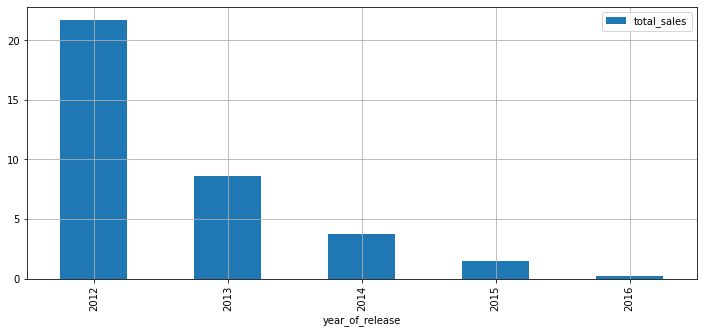

In [257]:
(reduced_data
           .query('platform == "Wii"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

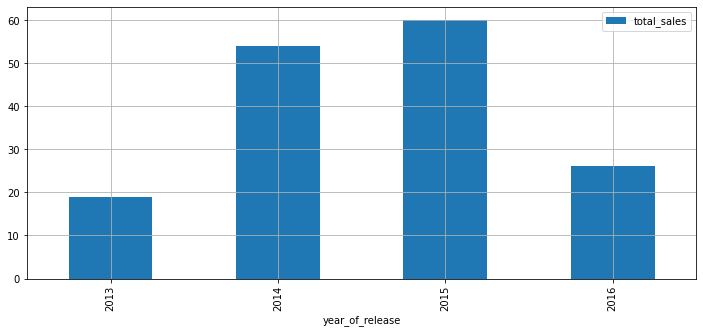

In [258]:
(reduced_data
           .query('platform == "XOne"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

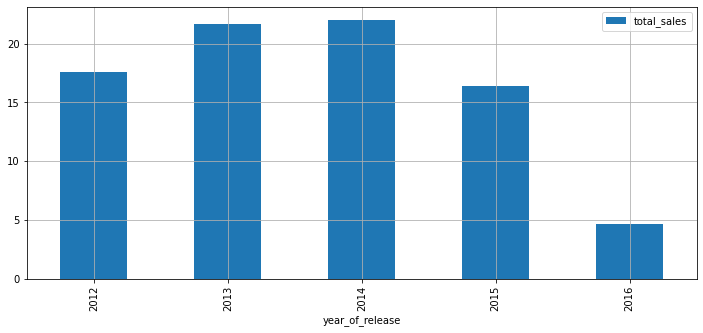

In [259]:
(reduced_data
           .query('platform == "WiiU"')
           .pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

Según las gráficas y mi análisis considero que las plataformas con mejores promedio de ventas y por lo tanto las más rentables serían 'PS4' y 'XOne'

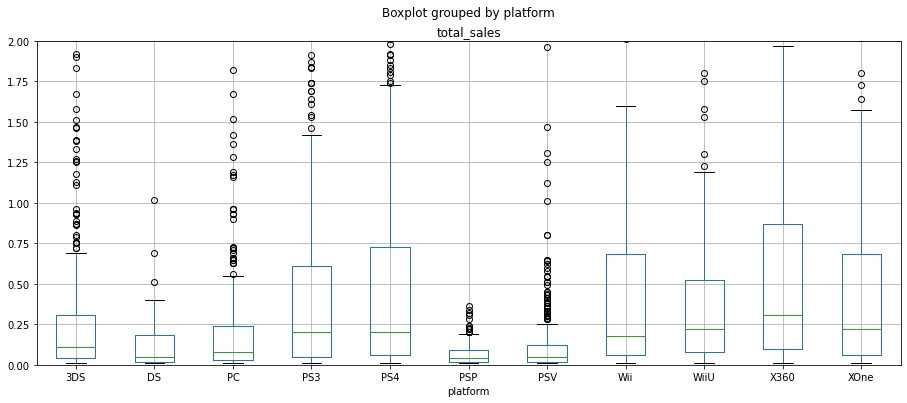

In [260]:
#Diagrama de caja para ventas globales
reduced_data.boxplot(column='total_sales', by='platform',figsize=(15, 6))
plt.ylim(0,2)
plt.show()

In [261]:
reduced_data.pivot_table(index='platform', values= 'total_sales', aggfunc=['sum','mean','max','min']).sort_values(by=('sum','total_sales'), ascending=False)

,sum,mean,max,min
,total_sales,total_sales,total_sales,total_sales
platform,,,,
PS4,314.14,0.801378,14.63,0.01
PS3,289.07,0.583980,21.05,0.01
X360,236.62,0.804830,16.27,0.01
3DS,194.64,0.490277,14.60,0.01
XOne,159.32,0.645020,7.39,0.01
WiiU,82.19,0.559116,7.09,0.01
PC,63.34,0.247422,5.14,0.01
PSV,49.18,0.119659,1.96,0.01


Al analizar las ventas por plataforma puedo llegar a la conclusión de que existen diferencias entre estas, la mayor venta es en la plataforma PS4 pero el mayor promedio no es en esta sino en X360, siendo esta útima una de las plataformas más rentables al igual que 'PS4'. Las plataformas con menores ventas son: 'Wii', 'DS' y 'PSP', las de mayores son: 'PS3', 'X360', 'PS4', 'XOne' y '3DS', a partir de esta última empiezan a decaer considerablemente las ventas totales.

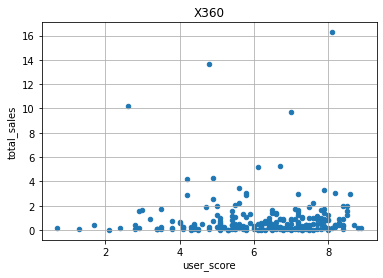

In [262]:
#Diagrama de dispersión de las calificaciones de usuarios respecto a las ventas
(reduced_data
           .query('platform == "X360"')
           .plot(x='user_score', y='total_sales', kind='scatter', grid=True, title= "X360")
)
plt.show()

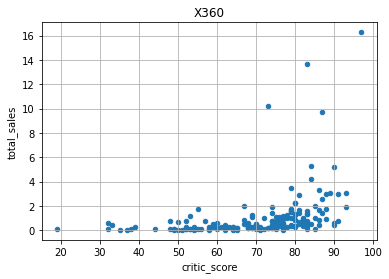

In [263]:
#Diagrama de dispersión de las calificaciones de profesionales respecto a las ventas
(reduced_data
           .query('platform == "X360"')
           .plot(x='critic_score', y='total_sales', kind='scatter', grid=True, title= "X360")
)
plt.show()

In [264]:
#Calculando coeficiente de correlación
reduced_data[reduced_data['platform']=='X360'][['total_sales','user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.008293,0.362134
user_score,0.008293,1.000000,0.560793
critic_score,0.362134,0.560793,1.000000


Al observar los gráficos de dispersión y los coeficientes de correlación puedo llegar a la conclusión de que mientras mejores y mayores sean las reseñas mayor serán las ventas en la plataforma PS2, si uno aumenta el otro igual lo hará ya que los coeficientes de correlación son positivos. Igual observo una mayor dependencia de las ventas con las reseñas de los profesionales en la plataforma PS3 ya que el coeficiente de correlación está más próximo a 1.

In [265]:
list_of_platforms = ['Wii', 'PS3', 'PS4', 'XOne' ,'3DS']
reduced_data[reduced_data['platform'].isin(list_of_platforms)][['total_sales','user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.005294,0.355367
user_score,0.005294,1.000000,0.536772
critic_score,0.355367,0.536772,1.000000


En otras cinco plataformas al azar, observo que efectivamente igual existe dependencia de las reseñas con respecto a las ventas totales, si una aumenta la otra igual lo hará.

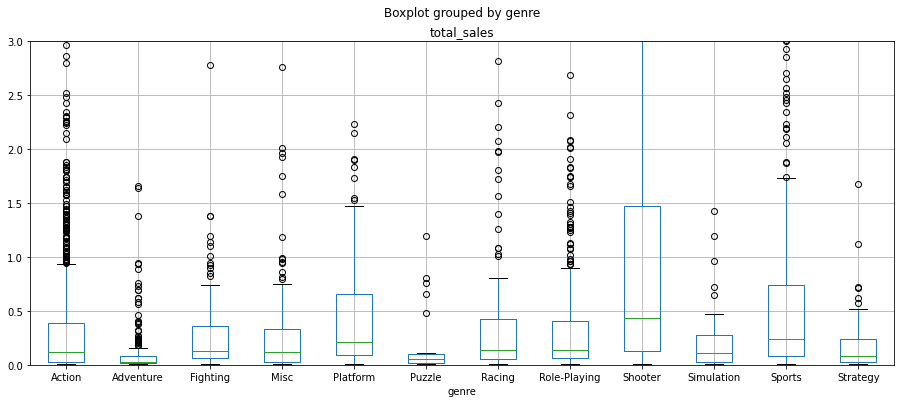

In [266]:
reduced_data.boxplot(column='total_sales', by='genre',figsize=(15, 6))
plt.ylim(0,3)
plt.show()

In [267]:
reduced_data.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Shooter,1.285865
Platform,0.717647
Sports,0.673903
Role-Playing,0.518468
Racing,0.465217
Misc,0.441865
Action,0.427150
Simulation,0.425060
Fighting,0.408165


Al observar la distribución de los géneros de los juegos respecto al promedio de ventas totales puedo llegar a la conclusión de que los géneros con mayor promedio son: 'Shooter', 'Platform' y 'Sports'; estos serían los más rentables. Los géneros con menores promedios de ventas serían: 'Adventure', 'Puzzle', 'Strategy'.

### Conclusiones
Luego del análisis de datos puedo llegar a las siguientes conclusiones:
1. En general las plataformas con mayores ventas son: "PS4", "X360" y "XOne"; estas serían las más rentables.
2. El mayor auge de ventas de las plataformas principales es durante el período del 2007 al 2011, luego de esto las ventas disminuyen considerablemente.
3. Los géneros más rentables son: 'Shooter', 'Platform' y 'Sports'; y los menos : 'Adventure', 'Puzzle', 'Strategy'.
4. Las plataformas con menores ventas son: 'Wii', 'DS' y 'PSP', las de mayores son: 'PS3', 'X360', 'PS4', 'XOne' y '3DS', a partir de esta última empiezan a decaer considerablemente las ventas totales.
5. Según los datos en la plataforma XOne mientras mayores sean las calificaciones de los usuarios y los profesionales mayores serán las ventas totales.


## Crear un perfil de usuario para cada región

In [268]:
#Calculando las cinco plataformas con mayores ventas
reduced_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
X360    140.12
PS4     108.74
PS3     103.44
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

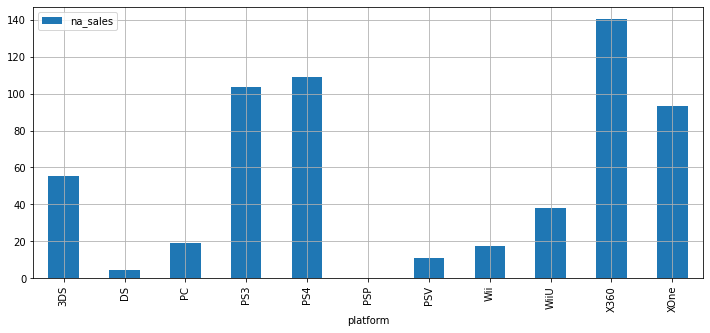

In [269]:
(reduced_data
           .pivot_table(index='platform',values='na_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

In [270]:
#Calculando las cinco plataformas con mayores ventas
reduced_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS4     141.09
PS3     107.02
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

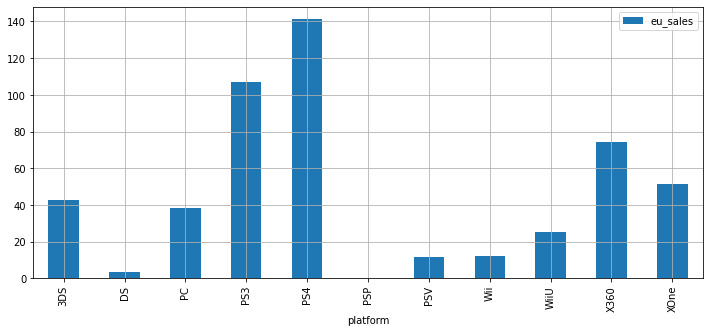

In [271]:
(reduced_data
           .pivot_table(index='platform',values='eu_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

In [272]:
#Calculando las cinco plataformas con mayores ventas
reduced_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS     87.82
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

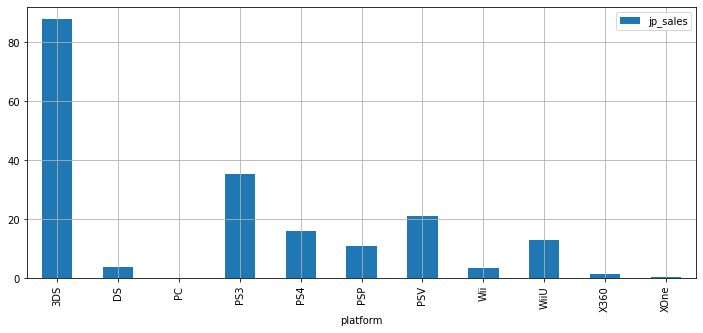

In [273]:
(reduced_data
           .pivot_table(index='platform',values='jp_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

Al graficar las ventas de cada región en cada una de las plataformas podemos llegar a las cinco plataformas con mayores ventas en las tres regiones(NA, EU, JP). Además podemos llegar a la conclusión de que existen diferencias, en Norteamérica y Europa son las mismas cinco plataformas principales pero el orden varía, en el caso de NA la plataforma con mayores ventas es X360 mientras que para EU es PS4, también observo que en Norteamérica las ventas se comportan similares a las de Europa. En el caso de la región JP observo que las plataformas principales son diferentes en comparación con las otras dos regiones, en este caso se mantienen PS3, PS4 y 3DS, pero se incorporan WiiU y PSV, comparando las ventas de las cinco plataformas principales observo que en japón las ventas están por debajo de las otras dos regiones.

In [274]:
#Calculando los cinco géneros principales
reduced_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Action          178.07
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

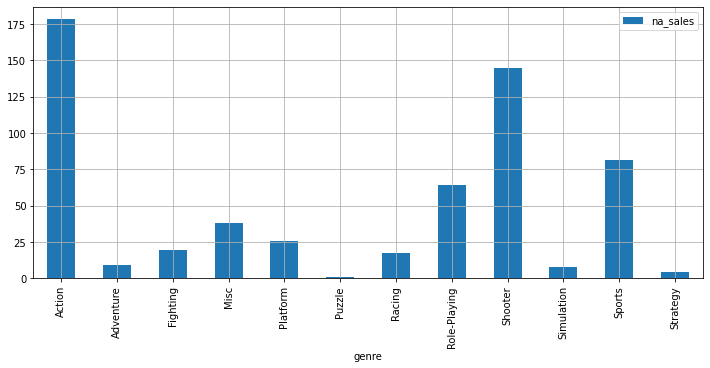

In [275]:
(reduced_data
           .pivot_table(index='genre',values='na_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

In [276]:
#Calculando los cinco géneros principales
reduced_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          159.87
Shooter         113.47
Sports           69.25
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

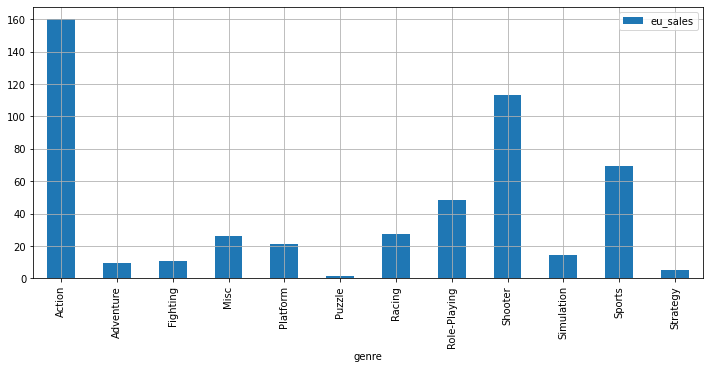

In [277]:
(reduced_data
           .pivot_table(index='genre',values='eu_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

In [278]:
#Calculando los cinco géneros principales
reduced_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    65.51
Action          52.94
Misc            13.10
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

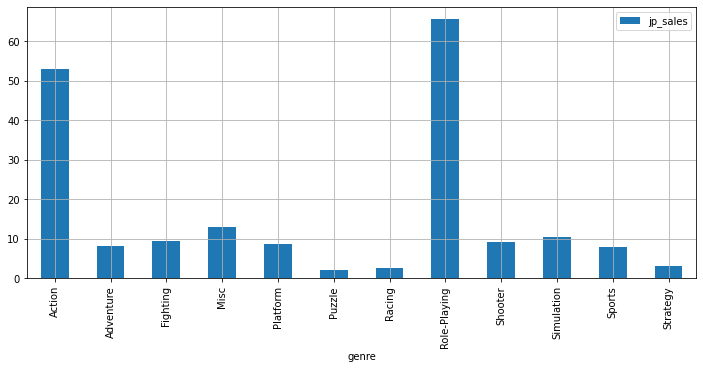

In [279]:
(reduced_data
           .pivot_table(index='genre',values='jp_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

Observando los cinco géneros principales en cada región podemos llegar a la conclusión de que en las tres regiones se mantienen como principales los géneros: Action, Sports y Role-Playing; NA y EU tienen en común también Shooter, en estas dos regiones los géneros principales son casi iguales la única diferencia es que el quinto en NA es Misc y en EU es Racing. En Japón varía un poco el orden siendo el de mayor ventas Role-Playing y el de menor Fighting. Vemos el mismo comportamiento en las ventas que con las plataformas, mayores ventas en Norteamérivca y Europa, menores en Japón.

In [280]:
#Calculando como varía ESRB
reduced_data.groupby( 'rating')['na_sales'].sum().sort_values(ascending=False)

rating
M          231.67
E          114.37
unknown    103.48
E10+        75.70
T           66.14
RP           0.00
Name: na_sales, dtype: float64

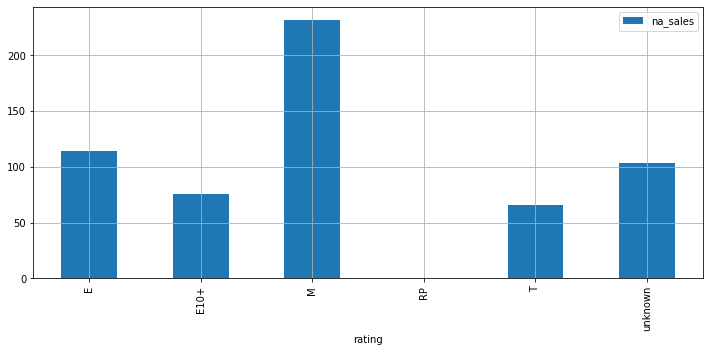

In [281]:
(reduced_data
           .pivot_table(index='rating',values='na_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

In [282]:
reduced_data.groupby( 'rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M          194.44
E          113.03
unknown     91.71
E10+        55.43
T           52.96
RP           0.04
Name: eu_sales, dtype: float64

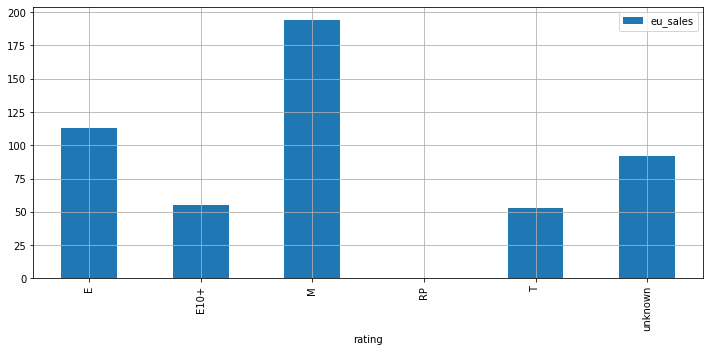

In [283]:
(reduced_data
           .pivot_table(index='rating',values='eu_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

In [284]:
reduced_data.groupby( 'rating')['jp_sales'].sum().sort_values(ascending=False)

rating
unknown    109.41
E           28.33
T           26.02
M           21.20
E10+         8.19
RP           0.00
Name: jp_sales, dtype: float64

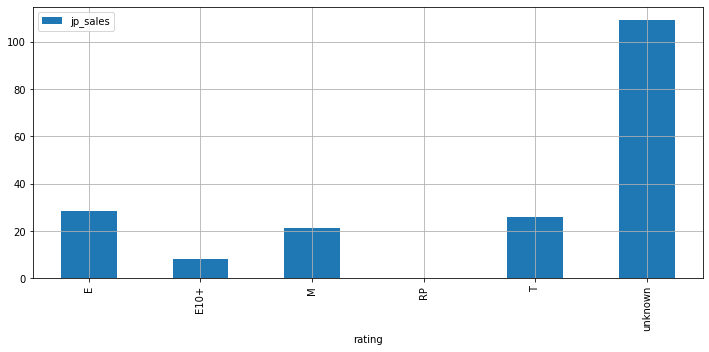

In [285]:
(reduced_data
           .pivot_table(index='rating',values='jp_sales', aggfunc='sum')
           .plot(grid=True,figsize=(12,5), kind='bar')
)
plt.show()

Las calificaciones con respecto a las ventas se comportan similares en Norteamérica y Europa, se observan mayores ventas en Norteamérica. En Japón si hay una notable diferencia, los juegos sin calificaciones tienen una mayor ventas, aunque seguimos evidenciando que esta región es la de menores ventas en general con respecto a las otras dos.

### Conclusiones
Luegos de analizar las cinco principales plataformas, los géneros y las calificaciones puedo llegar a las siguientes conclusiones:
- Las mayores ventas ocurren en Norteamérica mientras que las menores en Japón, en general las principales plataformas son: PS3, PS4 y 3DS, aunque cabe notar que en Japón también está entre las principales PSV. Con respecto a las géneros en Japón también hay un comportamiento diferente a las otras dos regiones, aunque en todas conciden entre los principales géneros: Action, Sports y Role-Playing. Viendo las ventas con respecto a las calificaciones evidencio que en Japón la mayor venta es de juegos sin calificaciones, mientras que en las otras dos regiones no se comporta así, básicamente en Norteamérica y Europa las ventas con respecto a las calificaciones se comportan muy parecidas.

## Probar las hipótesis

Primeramente voy a probar la siguiente hipótesis: 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.' para ello formularé mi hipótesis nula(H₀) y alternativa(H₁):

H₀ = Las calificaciones promedio de los usuarios para las plataformas Xbox One son iguales a las de PC.

H₁ = Las calificaciones promedio de los usuarios para las plataformas Xbox One son diferentes a las de PC.

In [286]:
varianza_xone = np.var(reduced_data[(reduced_data['platform']=='XOne') &(reduced_data['user_score'].isna()!=True)]['user_score'])
varianza_xone

1.8965188383045526

In [287]:
varianza_pc = np.var(reduced_data[(reduced_data['platform']=='PC') &(reduced_data['user_score'].isna()!=True)]['user_score'])
varianza_pc

2.748671012815949

A continuación realizaré la prueba de Shapiro para ello la H₀ es que existe normalidad y la H₁ que no existe.

In [288]:
# Comprobando normalidad con la prueba de Shapiro
normal_xone = st.shapiro(reduced_data[(reduced_data['platform']=='XOne') &(reduced_data['user_score'].isna()!=True)]['user_score'])
normal_xone

ShapiroResult(statistic=0.955055296421051, pvalue=1.524856543255737e-05)

In [289]:
# Comprobando normalidad con la prueba de Shapiro
normal_pc = st.shapiro(reduced_data[(reduced_data['platform']=='PC') &(reduced_data['user_score'].isna()!=True)]['user_score'])
normal_pc

ShapiroResult(statistic=0.9392838478088379, pvalue=9.836423942033434e-08)

En este caso rechazamos la hipótesis nula ya que el p-value es menor de la significación estadística crítica que es 5%, por lo que podemos llegar a la conclusión de que los datos no se distribuyen con normalidad, por esto haremos la prueba de levene para saber si las varianzas son estadísticamente iguales o diferentes.

In [290]:
#Prueba de Levene
# H₀: las varianzas son iguales
# H₁: las varianzas son diferentes
st.levene(reduced_data[(reduced_data['platform']=='XOne') &(reduced_data['user_score'].isna()!=True)]['user_score'], reduced_data[(reduced_data['platform']=='PC') &(reduced_data['user_score'].isna()!=True)]['user_score'])

LeveneResult(statistic=6.3676931987984045, pvalue=0.012016134374904607)

Viendo que el p-value es menor que la significación estadística crítica(5%), podemos rechazar la hipótesis nula lo que significa que las varianzas son estadísticamente diferentes, por lo tanto equal_var= False.

In [291]:
alpha = 0.05  # significación estadística crítica

results = st.ttest_ind(reduced_data[(reduced_data['platform']=='XOne') &(reduced_data['user_score'].isna()!=True)]['user_score'], reduced_data[(reduced_data['platform']=='PC') &(reduced_data['user_score'].isna()!=True)]['user_score'],equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula") 

p-value:  0.5582859272842213
No rechazamos la hipótesis nula


**Finalmente  no podemos rechazamos la hipóteisis nula para este caso por lo que podemos llegar a la conclusión de que las calificaciones promedio de los usuarios para las plataformas Xbox One son iguales a las de PC.**

La siguiente hipótesis a analizar es: 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.', para ello formularé mi hipótesis nula(H₀) y alternativa(H₁):
H₀: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
H₁: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [292]:
varianza_action = np.var(reduced_data[(reduced_data['genre']=='Action') &(reduced_data['user_score'].isna()!=True)]['user_score'])
varianza_action

1.8826402000896354

In [293]:
varianza_sports = np.var(reduced_data[(reduced_data['genre']=='Sports') &(reduced_data['user_score'].isna()!=True)]['user_score'])
varianza_sports

3.0073882971729127

A continuación realizaré la prueba de Shapiro para ello la H₀ es que existe normalidad y la H₁ que no existe.

In [294]:
# Comprobando normalidad con la prueba de Shapiro
normal_action = st.shapiro(reduced_data[(reduced_data['genre']=='Action') &(reduced_data['user_score'].isna()!=True)]['user_score'])
normal_action

ShapiroResult(statistic=0.9137240648269653, pvalue=9.77186640265967e-17)

In [295]:
normal_sports = st.shapiro(reduced_data[(reduced_data['genre']=='Sports') &(reduced_data['user_score'].isna()!=True)]['user_score'])
normal_sports

ShapiroResult(statistic=0.9690107107162476, pvalue=0.0002625079359859228)

Acá igual rechazamos la hipótesis nula ya que el p-value es menor de la significación estadística crítica que es 5%, por lo que podemos llegar a la conclusión de que los datos no se distribuyen con normalidad, por esto haremos la prueba de levene para saber si las varianzas son estadísticamente iguales o diferentes.

In [296]:
#Prueba de Levene
# H₀: las varianzas son iguales
# H₁: las varianzas son diferentes
st.levene(reduced_data[(reduced_data['genre']=='Action') &(reduced_data['user_score'].isna()!=True)]['user_score'], reduced_data[(reduced_data['genre']=='Sports') &(reduced_data['user_score'].isna()!=True)]['user_score'])

LeveneResult(statistic=19.26111823768496, pvalue=1.3109853828468498e-05)

Viendo que el p-value es menor que la significación estadística crítica(5%), rechazamos la hipótesis nula lo que significa que las varianzas son estadísticamente diferentes, por lo tanto equal_var = False.

In [297]:
alpha = 0.05  # significación estadística crítica

results = st.ttest_ind(reduced_data[(reduced_data['genre']=='Action') &(reduced_data['user_score'].isna()!=True)]['user_score'], reduced_data[(reduced_data['genre']=='Sports') &(reduced_data['user_score'].isna()!=True)]['user_score'],equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula") 

p-value:  4.078419489491382e-20
Rechazamos la hipótesis nula


**En este caso rechazamos la hipótesis nula por lo que podemos llegar a la conclusión de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

### Conclusiones
Luego de analizar ambas hipótesis, hallar si las varianzas eran estadísticamente iguales o no, podemos llegar a la conclusión de que las calificaciones promedio de los usuarios para las plataformas Xbox One son iguales a las de PC y las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## Conclusión general
Luego de finalizar cada una de las etapas mencionadas al inicio del proyecto puedo llegar a las siguientes conclusiones generales:
1. En el estudio de la información general del DataFrame detecté que existían detalles en la ortografía que debían ser corregidos, valores ausentes que debían ser imputados y otros que debían trabajarse de otra manera.
2. En el caso de los valores ausentes llegué a la conclusión de que en la columna 'year_of_release' era necesario imputar los valores para ello ocupé dataset externos, en las columnas name y genre eliminé las filas con valores ausentes ya que coincidían para ambas columnas y existían otras donde igual estaban ausentes, en la columna 'rating' los rellené con unknown ya que esta clasificación es dada por expertos, en las dos columnas restantes user_score y critic_score los dejé tal cual ya que esta ausencia puede deberse a que aún no hay calificaciones para estos juegos.
3. Fue necesario enriquecer los datos con una nueva columna total_sales donde están las ventas totales de los videojuegos.
4. Las plataformas con menores ventas son: 'Wii', 'DS' y 'PSP', las de mayores son: 'PS3', 'X360', 'PS4', 'XOne' y '3DS', a partir de esta última empiezan a decaer considerablemente las ventas totales.
5. Los géneros más rentables son: 'Shooter', 'Platform' y 'Sports'; y los menos : 'Adventure', 'Puzzle', 'Strategy'.
6. Según los datos en la plataforma XOne mientras mayores sean las calificaciones de los usuarios y los profesionales mayores serán las ventas totales.
7. Con respecto a las ventas en cada región pude deducir que las mayores ventas de videojuegos ocurren en Norteamérica y Europa, las más bajas en Japón.
8. Luego de analizar ambas hipótesis, hallar si las varianzas eran estadísticamente iguales o no, podemos llegar a la conclusión de que las calificaciones promedio de los usuarios para las plataformas Xbox One son iguales a las de PC y las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.